#Exploring Unlabeled Data in Python

##Step 1: Setting Up Your Python Environment

In [1]:
# Essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Set plot style for better visualization
sns.set_theme()

##Step 2: Loading the Unlabeled Dataset


In [2]:
# Load the Mall Customer Segmentation Data

!curl -L -o ./customer-segmentation-tutorial-in-python.zip\
  https://www.kaggle.com/api/v1/datasets/download/vjchoudhary7/customer-segmentation-tutorial-in-python
!unzip -o ./customer-segmentation-tutorial-in-python.zip
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(data.head())

# Get basic statistics of the dataset
print("\nDescriptive statistics:")
print(data.describe())

# Get information about the dataset columns and data types
print("\nDataset information:")
print(data.info())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1583  100  1583    0     0   1857      0 --:--:-- --:--:-- --:--:--  1857
Archive:  ./customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      
First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Descriptive statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000      

##Step 3: Preprocessing the Data

In [3]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Rename columns for easier access (if needed)
data.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

# Check for duplicate entries
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")

# If there were missing values, we could handle them like this:
# data.fillna(method='ffill', inplace=True)  #added during screencast


Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Number of duplicate entries: 0


##Step 4: Visualizing the Data

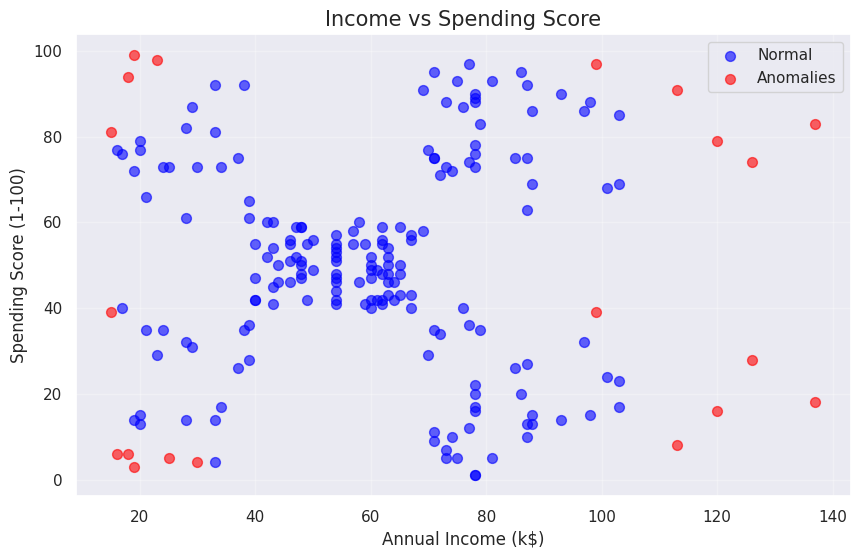

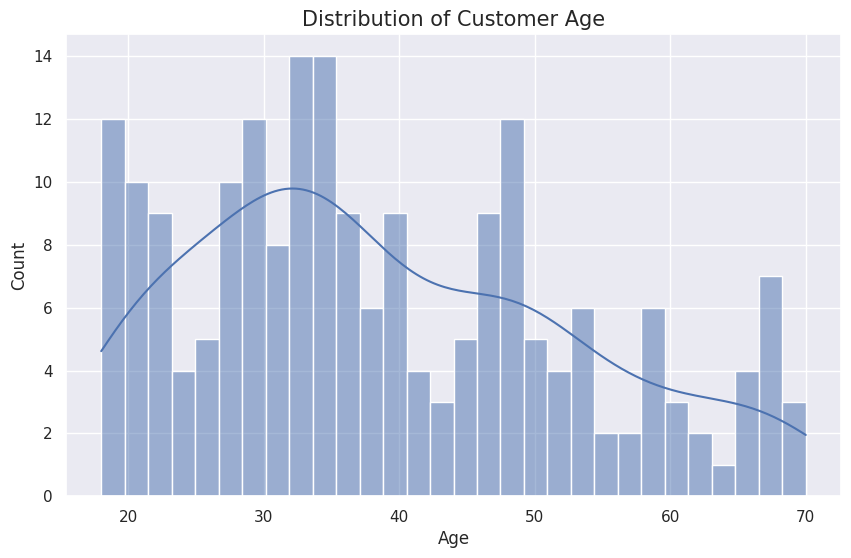

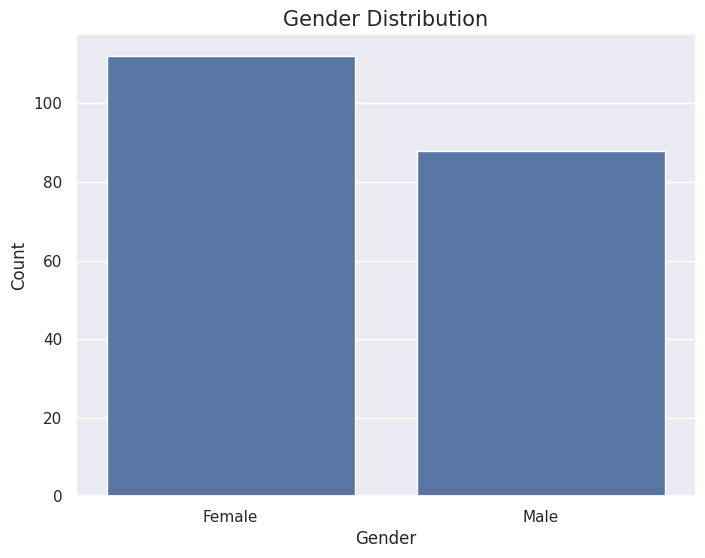

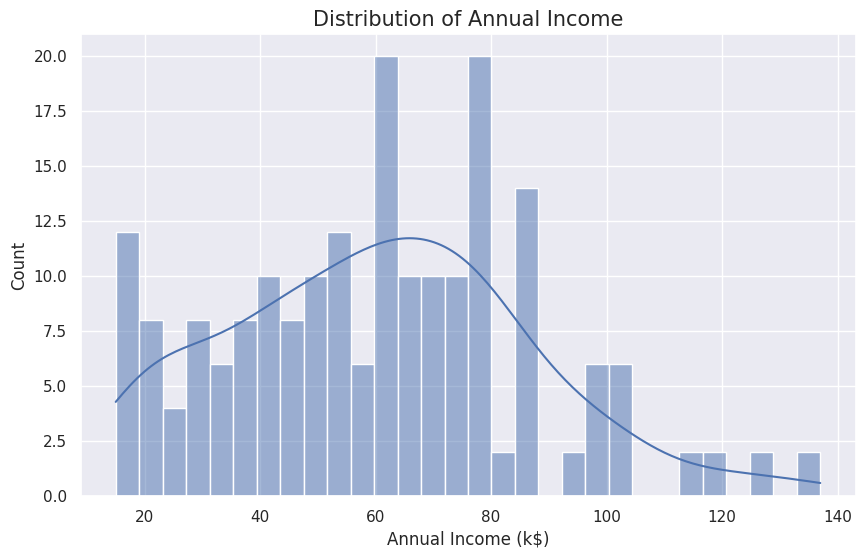

In [4]:
# Create a scatter plot to visualize relationship between income and spending with anomaly detection
plt.figure(figsize=(10, 6))

# Prepare data for anomaly detection
X = data[['Annual_Income', 'Spending_Score']].values

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
labels = iso_forest.fit_predict(X)

# Normal points (label == 1), anomalies (label == -1)
normal_points = X[labels == 1]
anomalous_points = X[labels == -1]

# Plot normal points in blue
plt.scatter(normal_points[:, 0], normal_points[:, 1], alpha=0.6, s=50, c='blue', label='Normal')
# Plot anomalous points in red
plt.scatter(anomalous_points[:, 0], anomalous_points[:, 1], alpha=0.6, s=50, c='red', label='Anomalies')

plt.title('Income vs Spending Score', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.show()

# Gender distribution
plt.figure(figsize=(8, 6))
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.show()

# Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual_Income'], bins=30, kde=True)
plt.title('Distribution of Annual Income', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.show()

##Step 5: Exploring Data Patterns

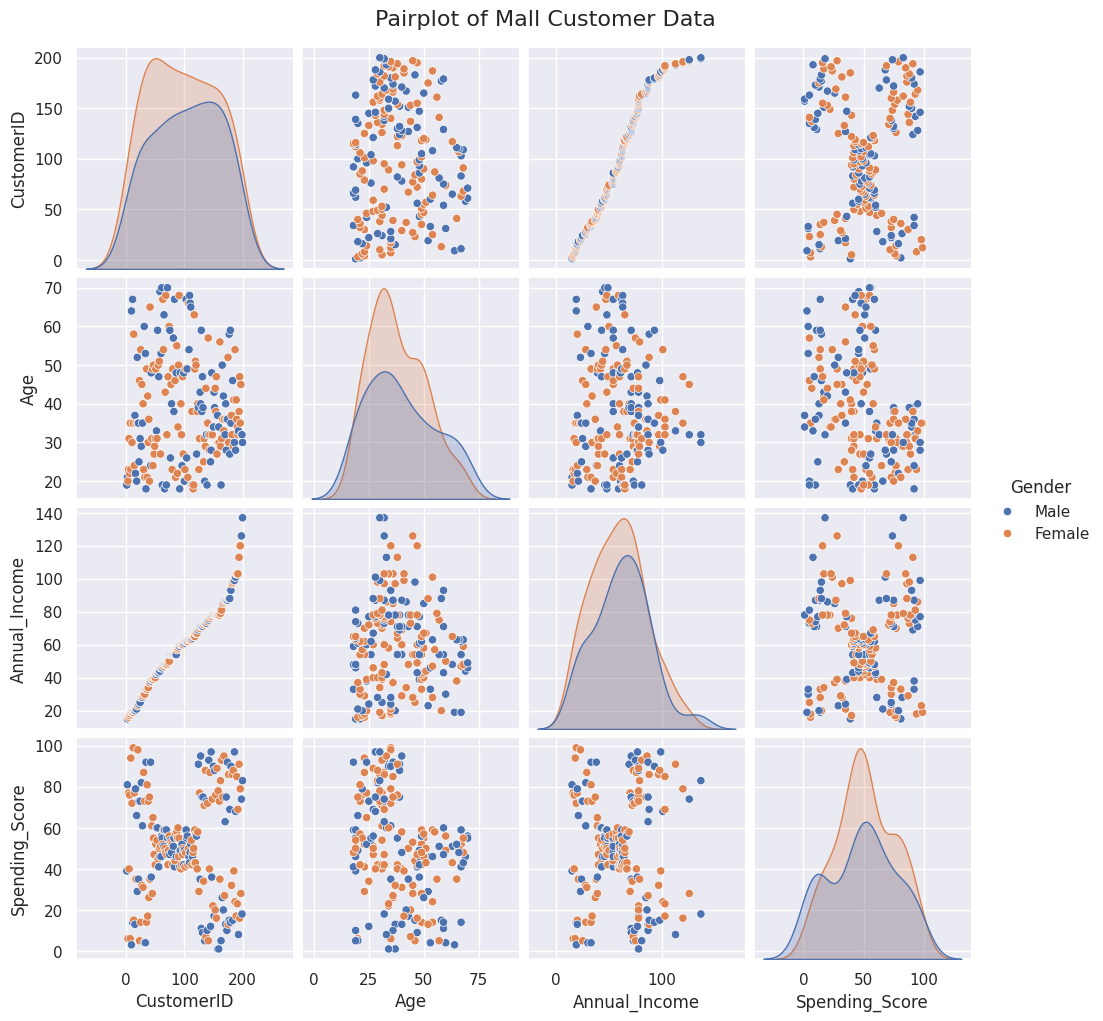

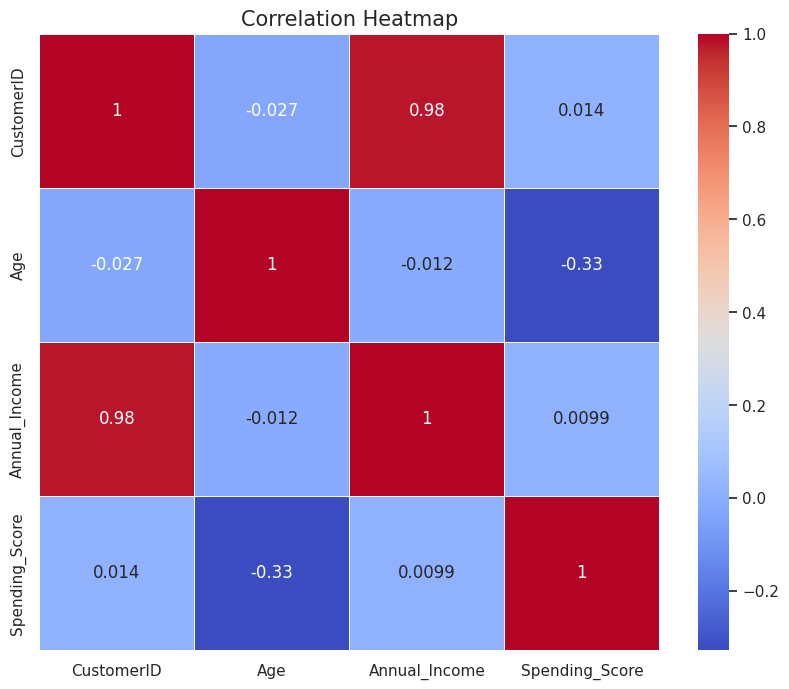

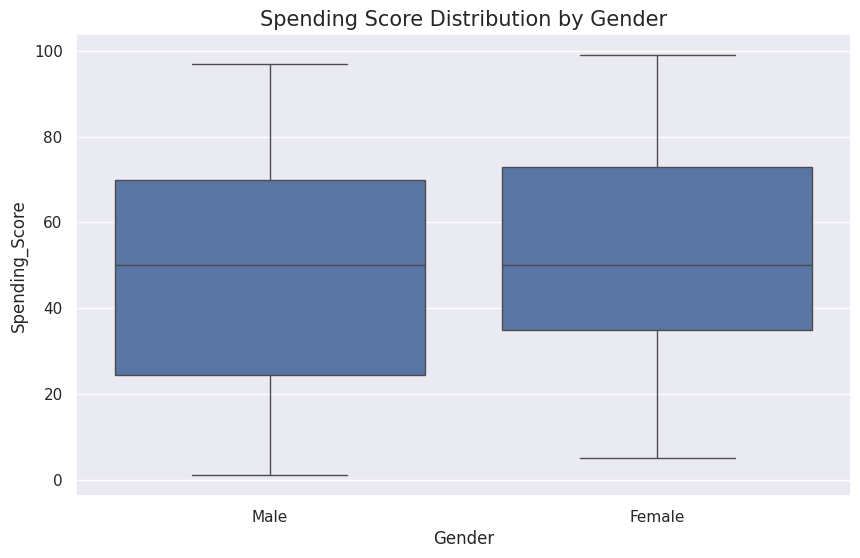

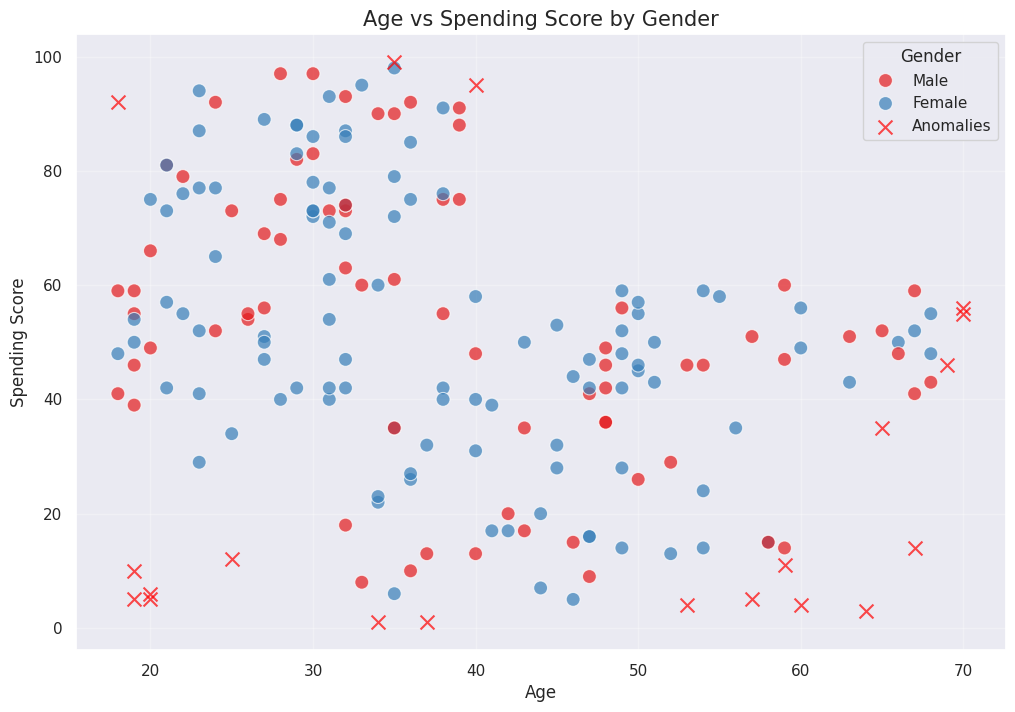

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Create a pairplot to visualize relationships between all numerical variables
sns.pairplot(data, hue='Gender')
plt.suptitle('Pairplot of Mall Customer Data', y=1.02, fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

# Box plots for spending score by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending_Score', data=data)
plt.title('Spending Score Distribution by Gender', fontsize=15)
plt.show()

# Age vs Spending Score with gender differentiation and anomaly detection
plt.figure(figsize=(12, 8))

# Prepare data for anomaly detection
X = data[['Age', 'Spending_Score']].values

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
labels = iso_forest.fit_predict(X)

# Create a new column in the DataFrame to mark anomalies
data['Anomaly'] = labels  # -1 for anomalies, 1 for normal

# Plot normal points with gender differentiation
sns.scatterplot(x='Age', y='Spending_Score', hue='Gender', data=data[data['Anomaly'] == 1],
                s=100, alpha=0.7, palette='Set1')
# Plot anomalous points in red with 'X' marker
anomalous_data = data[data['Anomaly'] == -1]
plt.scatter(anomalous_data['Age'], anomalous_data['Spending_Score'], c='red', marker='x',
            s=100, label='Anomalies', alpha=0.7)

plt.title('Age vs Spending Score by Gender', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
plt.show()

# Clean up temporary column
data = data.drop('Anomaly', axis=1)